# Libraries

In [1]:
import pandas as pd # Used to open and analyse the dataset
import matplotlib.pyplot as plt # Used to create charts
import numpy as np # Used to do data processing
import plotly as plty # Used to create charts
import seaborn as sns # Used to create charts
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # Used to check stationarity 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy.stats import shapiro
sns.set_theme()
plt.rcParams['font.family'] = 'serif'
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error,mean_absolute_error
from catboost import CatBoostRegressor

ModuleNotFoundError: ignored

In [ ]:
# Importing the file with Tools usefull to ML (created by our team)
import sys
sys.path.append('/content/gdrive/MyDrive/DRIM challenge/')
import tools as tl

# Data importation and reading

In [ ]:
# Same link for everyone
data = pd.read_sas("/content/gdrive/MyDrive/DRIM challenge/construct_red.sas7bdat")
data_macro = pd.read_excel("/content/gdrive/MyDrive/DRIM challenge/macro.xlsx")

In [ ]:
# First view of the data
data

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
0,2008-12-31,b'CHR2',0.0030,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,...,0.727543,0.070852,0.351216,0.577932,0.392129,0.607871,b'Q42008',497736.0,1.760576,7.800000
1,2008-12-31,b'CHR8',0.1924,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,...,0.320747,0.181759,0.541801,0.276439,0.548512,0.451488,b'Q42008',497736.0,1.760576,7.800000
2,2008-12-31,b'Totale',0.0240,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,...,0.656708,0.102888,0.370723,0.526389,0.451145,0.548855,b'Q42008',497736.0,1.760576,7.800000
3,2009-03-31,b'CHR2',0.0025,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,...,0.738127,0.068228,0.342803,0.588969,0.376661,0.623339,b'Q12009',489227.0,0.624887,8.600000
4,2009-03-31,b'CHR8',0.1436,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,...,0.346455,0.177304,0.532900,0.289797,0.543935,0.456065,b'Q12009',489227.0,0.624887,8.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2014-12-31,b'CHR8',0.1420,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,...,0.380543,0.163969,0.550329,0.285702,0.445203,0.554797,b'Q4 2014',519315.0,0.277815,10.500000
74,2014-12-31,b'Totale',0.0148,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,...,0.697692,0.093913,0.375277,0.530810,0.393627,0.606373,b'Q4 2014',519315.0,0.277815,10.500000
75,2015-03-31,b'CHR2',0.0019,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,...,0.802613,0.072954,0.352079,0.574967,0.344226,0.655774,b'Q1 2015',522560.0,-0.240585,10.366667
76,2015-03-31,b'CHR8',0.1381,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,...,0.373486,0.166169,0.551933,0.281898,0.449726,0.550274,b'Q1 2015',522560.0,-0.240585,10.366667


In [ ]:
data_macro

,date,CAC40,ExchangeRate,LendingRate
0,14244.0,2973.919922,1.285099,2.4310
1,14334.0,3159.850098,1.323522,2.8776
2,14425.0,3426.270020,1.426005,2.8335
3,14517.0,3607.689941,1.473297,2.8154
4,14609.0,3739.459961,1.387694,2.7190
5,14699.0,3816.989990,1.329805,2.4817
6,14790.0,3643.139893,1.304002,2.4647
7,14882.0,3833.500000,1.377809,1.9495
8,14974.0,4005.500000,1.357276,1.8484
9,15064.0,4106.919922,1.482096,1.8305


In [ ]:
data_macro.shape

(26, 4)

## Dividing and ploting the dataset

We have to forecast the variable DR: 12-months default rate.
The dataset is in reality three different dataset and we can compare them with the "CHRONIQUE" variable. After creating these three dataset we will work on each other to determine what are the important features to use.



In [ ]:
df = data[data.CHRONIQUE == b'Totale']
df = df.copy()
df = df.set_index(data.index[:26])
df["CAC40"] = data_macro.CAC40
df["ExchangeRate"] = data_macro.ExchangeRate
df["LendingRate"] = data_macro.LendingRate
df["Inflation"] = df["Inflation"].shift(2)
df = df.iloc[2:,:]
Y = df.DR

In [ ]:
df

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho,CAC40,ExchangeRate,LendingRate
2,2009-06-30,b'Totale',0.0190,0.975538,0.993828,0.912033,0.942061,0.978377,0.998148,0.999210,...,0.534694,0.431299,0.568701,b'Q22009',488744.0,1.760576,9.133333,3426.270020,1.426005,2.8335
3,2009-09-30,b'Totale',0.0188,0.975860,0.993828,0.913269,0.942364,0.978442,0.998182,0.999217,...,0.538717,0.425421,0.574579,b'Q32009',489557.0,0.624887,9.166667,3607.689941,1.473297,2.8154
4,2009-12-31,b'Totale',0.0186,0.976654,0.993889,0.915678,0.943810,0.978965,0.998202,0.999237,...,0.542307,0.410855,0.589145,b'Q42009',492638.0,-0.206626,9.533333,3739.459961,1.387694,2.7190
5,2010-03-31,b'Totale',0.0184,0.977482,0.993910,0.918015,0.945044,0.979263,0.998208,0.999253,...,0.538648,0.404298,0.595702,b'Q12010',495051.0,-0.423247,9.366667,3816.989990,1.329805,2.4817
6,2010-06-30,b'Totale',0.0184,0.977519,0.993819,0.918966,0.945396,0.979168,0.998207,0.999253,...,0.534411,0.395839,0.604161,b'Q22010',498121.0,0.364611,9.266667,3643.139893,1.304002,2.4647
7,2010-09-30,b'Totale',0.0180,0.977859,0.993733,0.919274,0.945714,0.979140,0.998192,0.999253,...,0.530722,0.394538,0.605462,b'Q32010',500437.0,1.324575,9.166667,3833.500000,1.377809,1.9495
8,2010-12-31,b'Totale',0.0166,0.978479,0.993905,0.919541,0.946142,0.979448,0.998212,0.999253,...,0.548363,0.371652,0.628348,b'Q42010',503500.0,1.613594,9.200000,4005.500000,1.357276,1.8484
9,2011-03-31,b'Totale',0.0170,0.978394,0.993788,0.918966,0.945368,0.979135,0.998191,0.999253,...,0.535090,0.368963,0.631037,b'Q12011',508939.0,1.543022,9.166667,4106.919922,1.482096,1.8305
10,2011-06-30,b'Totale',0.0173,0.978420,0.993632,0.918227,0.944716,0.978697,0.998144,0.999253,...,0.528923,0.369817,0.630183,b'Q22011',508710.0,1.641913,9.100000,3672.770020,1.433199,1.8570
11,2011-09-30,b'Totale',0.0174,0.978471,0.993645,0.917707,0.944303,0.978614,0.998148,0.999253,...,0.528726,0.366069,0.633931,b'Q32011',510179.0,1.796153,9.200000,3242.840088,1.414007,1.8484


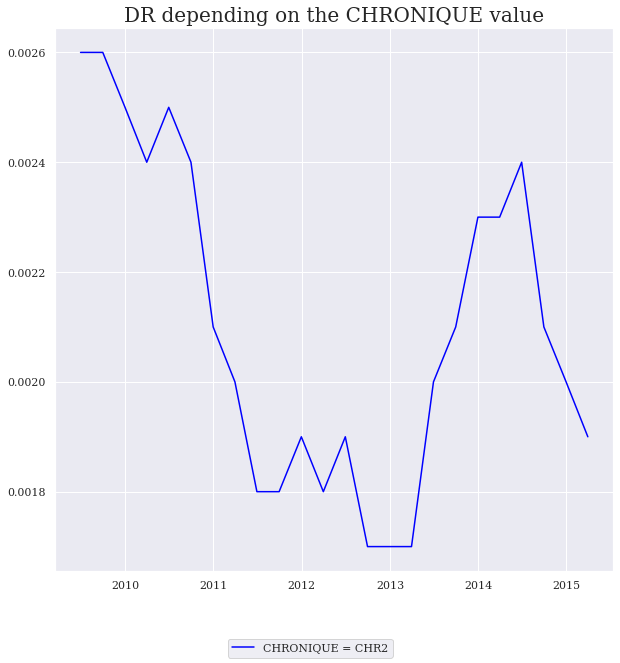

In [ ]:
fig = plt.figure(figsize = (10,10))

plt.plot(df.TRIMESTRE,Y,color="blue",label="CHRONIQUE = CHR2") 
plt.title('DR depending on the CHRONIQUE value',fontsize=20)
fig.legend(loc="lower center") 
plt.show()

# Data Analysis

## Formating

In [ ]:
# We are defining the Index as the datetime
df = df.set_index(df.TRIMESTRE)
df = df.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)
df.head()

,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,mean_2,median_2,...,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,PIB,Inflation,Tx_cho,CAC40,ExchangeRate,LendingRate
TRIMESTRE,,,,,,,,,,,,,,,,,,,,,
2009-06-30,0.994799,0.995176,0.992109,0.992591,0.993691,0.996275,0.996864,0.997038,575.437500,493.5,...,0.346352,0.586726,0.372296,0.627704,488744.0,1.760576,9.133333,3426.270020,1.426005,2.8335
2009-09-30,0.994796,0.995147,0.992103,0.992587,0.993679,0.996273,0.996862,0.997025,552.818182,551.5,...,0.342026,0.591951,0.366987,0.633013,489557.0,0.624887,9.166667,3607.689941,1.473297,2.8154
2009-12-31,0.994789,0.995126,0.992101,0.992591,0.993665,0.996266,0.996860,0.997013,556.055556,587.5,...,0.338599,0.596093,0.352282,0.647718,492638.0,-0.206626,9.533333,3739.459961,1.387694,2.7190
2010-03-31,0.994794,0.995123,0.992109,0.992598,0.993655,0.996269,0.996862,0.997014,643.375000,626.5,...,0.343029,0.591723,0.346076,0.653924,495051.0,-0.423247,9.366667,3816.989990,1.329805,2.4817
2010-06-30,0.994822,0.995079,0.992095,0.992578,0.993618,0.996250,0.996853,0.997008,582.210526,525.5,...,0.346701,0.587028,0.338703,0.661297,498121.0,0.364611,9.266667,3643.139893,1.304002,2.4647


In [ ]:
print(df.columns)

Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8', 'CD_TY_CLI_RCI_1', 'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1',
       'CD_ETA_CIV_2', 'CD_MOD_HABI_1', 'CD_MOD_HABI_2', 'CD_PROF_1',
       'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1', 'CD_QUAL_VEH_2', 'PIB',
       'Inflation', 'Tx_cho', 'CAC40', 'ExchangeRate', 'LendingRate'],
      dtype='object')


## General Correlation for all variables

In [ ]:
variables = df.columns[df.columns != 'DR']
values = []
for column in variables:
  values.append(pd.DataFrame(np.array([Y,df[column]]).T).corr().iloc[0,1])
correlation = pd.DataFrame(np.array(values).T,index = variables,columns = ["Correlation with DR"])

Remarks:
Concerning the correlation, values like "Client Type", "Type of housing", "Civil status", and "Vehicle quality code" have opposite correlation because CD_TY_CLI_RCI_1 = 1 - CD_TY_CLI_RCI_2, hence cov(CD_TY_CLI_RCI_1,DR) = - cov(CD_TY_CLI_RCI_2,DR)

## Low Variance test

In [ ]:
# Analyzing variance of each variables in order to eliminate features with low variance

var = VarianceThreshold() 
var.fit_transform(df) 
df.columns[var.get_support()]

Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8', 'CD_TY_CLI_RCI_1', 'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1',
       'CD_ETA_CIV_2', 'CD_MOD_HABI_1', 'CD_MOD_HABI_2', 'CD_PROF_1',
       'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1', 'CD_QUAL_VEH_2', 'PIB',
       'Inflation', 'Tx_cho', 'CAC40', 'ExchangeRate', 'LendingRate'],
      dtype='object')

In [ ]:
X = df[df.columns[var.get_support()]]
X_init = X

Remarks: We eliminated theses variables: median_6, p5_6, p10_6, p25_6, p75_6, p90_6, p95_6. We will see after that all theses variables are equal to zero.


## Multicollinearity test

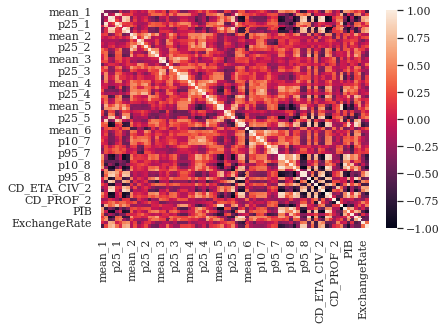

In [ ]:
corr = X.corr()
sns.heatmap(corr)

The heatmap is unreadable so we are doing an analysis in order to find couple were the correlation is greater then 0.9 in absolute value. Indeed, multicolinearity is not a good thing for our model

In [ ]:
# Find the couple of variables where the correlation between them is greater or equal 0.9 in absolute value
abscorr = abs(corr)

# we create the filter to choose have a Boolean DataFrame (not necessary to do that) 
filter = abscorr>=0.9

couple = []

for ind in filter.index:
  for col in filter.columns:
    if filter.loc[ind,col] == True and ind != col and sorted([ind,col]) not in couple:
      # We add a sorted list for each couple that fits the condition
      couple.append(sorted([ind,col]))

print("\n".join(sorted(map(lambda x: ' '.join(x),couple))) if couple != [] else None)

CD_ETA_CIV_1 CD_ETA_CIV_2
CD_MOD_HABI_1 CD_MOD_HABI_2
CD_MOD_HABI_1 PIB
CD_MOD_HABI_1 mean_8
CD_MOD_HABI_1 p10_1
CD_MOD_HABI_1 p25_8
CD_MOD_HABI_1 p5_1
CD_MOD_HABI_1 p90_1
CD_MOD_HABI_2 PIB
CD_MOD_HABI_2 mean_8
CD_MOD_HABI_2 p10_1
CD_MOD_HABI_2 p25_8
CD_MOD_HABI_2 p5_1
CD_MOD_HABI_2 p90_1
CD_PROF_1 p25_5
CD_PROF_1 p90_1
CD_QUAL_VEH_1 CD_QUAL_VEH_2
CD_QUAL_VEH_1 median_5
CD_QUAL_VEH_1 p10_8
CD_QUAL_VEH_2 median_5
CD_QUAL_VEH_2 p10_8
CD_TY_CLI_RCI_1 CD_TY_CLI_RCI_2
CD_TY_CLI_RCI_1 Tx_cho
CD_TY_CLI_RCI_2 Tx_cho
PIB mean_8
PIB p10_1
PIB p25_8
PIB p5_1
PIB p95_8
Tx_cho p90_5
Tx_cho p95_5
mean_5 median_5
mean_8 median_8
mean_8 p25_8
mean_8 p90_1
mean_8 p95_8
median_1 p25_1
median_8 p25_8
median_8 p90_1
p10_1 p25_8
p10_1 p5_1
p25_5 p90_1
p25_8 p90_1
p25_8 p90_8
p25_8 p95_8
p5_1 p95_5
p90_3 p95_3
p90_5 p95_5
p90_8 p95_8


We have to delete some features in order to prevent from collinearity: CD_ETA_CIV_2, CD_MOD_HABI_1, CD_TY_CLI_RCI_2, mean_5, mean_6, mean_7, mean_8, median_8, median_1, p25_8, p90_3, p90_5, p90_8

In [ ]:
wrong_col = "CD_ETA_CIV_2, CD_MOD_HABI_2, CD_TY_CLI_RCI_2, mean_5, mean_6, mean_7, mean_8, median_8, median_1, p25_8, p90_3, p90_5, p90_8, CD_PROF_3".split(", ")
X = X.drop(wrong_col,axis = 1)

## Selection of variables with correlation criterium

In [ ]:
correlation.loc[X.columns]

,Correlation with DR
mean_1,-0.407019
p5_1,0.500617
p10_1,0.689325
p25_1,0.657805
p75_1,0.205243
p90_1,0.591561
p95_1,0.310079
mean_2,-0.148863
median_2,-0.104771
p5_2,-0.233662


In [ ]:
# We keep all the correlation with absolute value greater then 0.60 
new_correlation = correlation.loc[X.columns]
Xend = X[X.columns[abs(new_correlation["Correlation with DR"]) >= 0.6]]

## Analysis of each variables (Optional and not usefull)

### Recalculated award score
mean_1, median_1, p5_1, p10_1, p25_1, p75_1, p90_1, p95_1

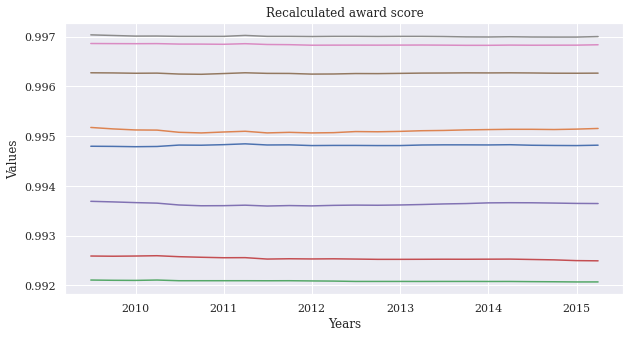

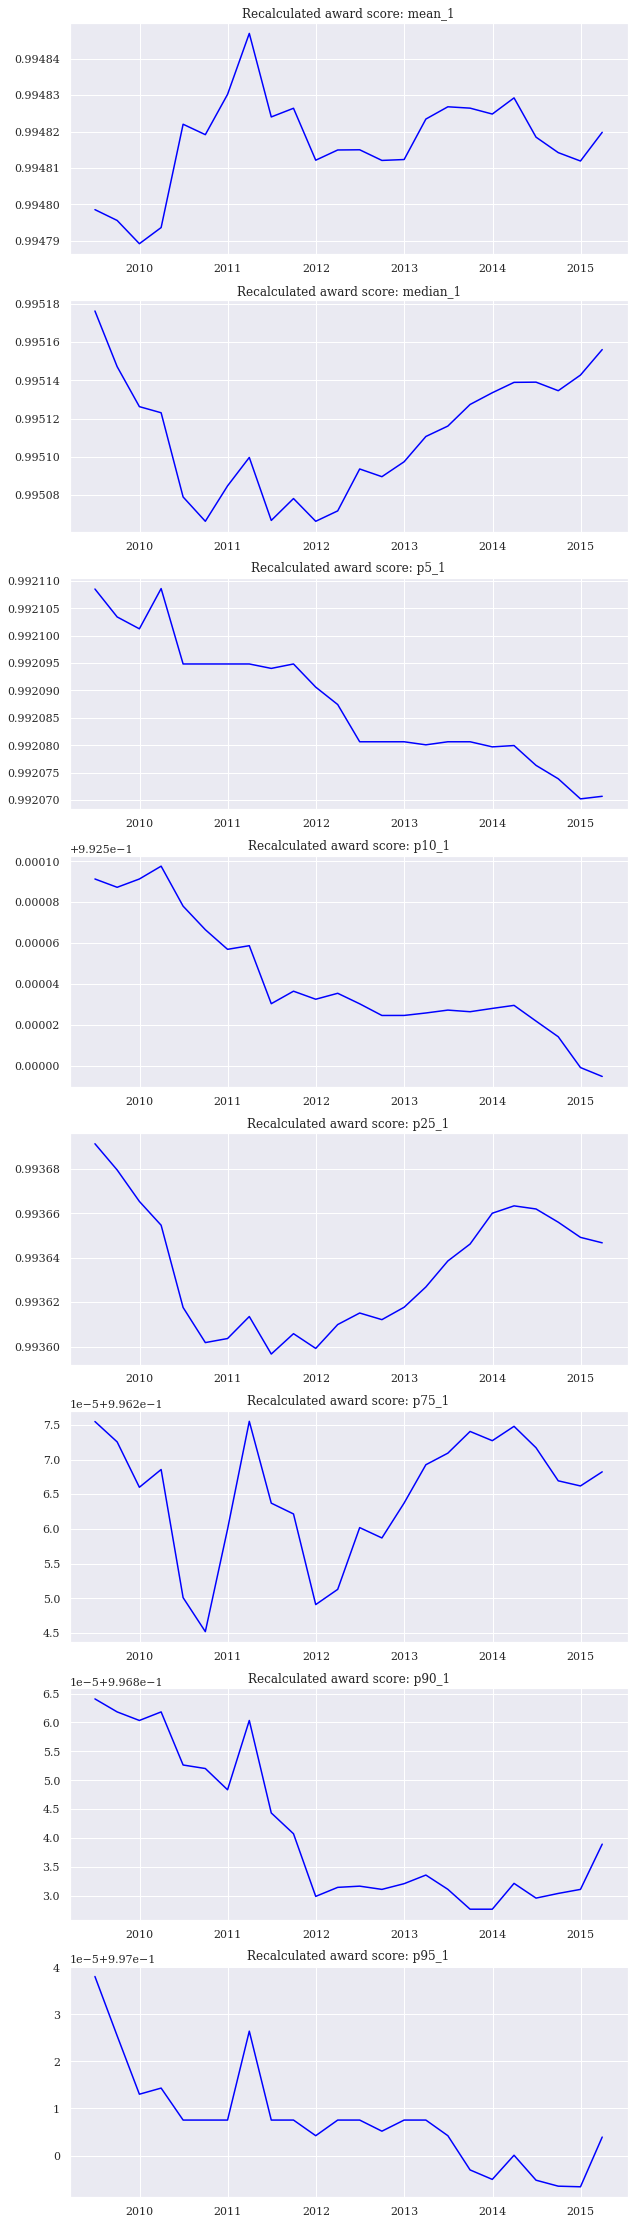

In [ ]:
col = ['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1','p95_1']

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Recalculated award score")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Recalculated award score: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_1,-0.202734
median_1,0.614419
p5_1,0.381204
p10_1,0.564469
p25_1,0.729438
p75_1,0.145661
p90_1,0.660610
p95_1,0.435734


In [ ]:
df[col].describe()

,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.994817,0.995117,0.992088,0.992543,0.993639,0.996265,0.996843,0.997009
std,0.000015,0.000038,0.000011,0.000029,0.000031,0.000009,0.000014,0.000011
min,0.994782,0.995066,0.992070,0.992495,0.993597,0.996245,0.996828,0.996993
25%,0.994812,0.995086,0.992080,0.992526,0.993612,0.996260,0.996831,0.997004
50%,0.994819,0.995120,0.992084,0.992530,0.993642,0.996267,0.996836,0.997008
75%,0.994826,0.995139,0.992095,0.992565,0.993661,0.996272,0.996858,0.997012
max,0.994847,0.995192,0.992109,0.992598,0.993694,0.996276,0.996864,0.997038


Remarks: No stationarity observed. Few variables have an high correlation with DR, p25_1, p90_1, median_1

### Time elapsed since last payment
mean_2, median_2, p5_2, p10_2, p25_2, p75_2, p90_2, p95_2

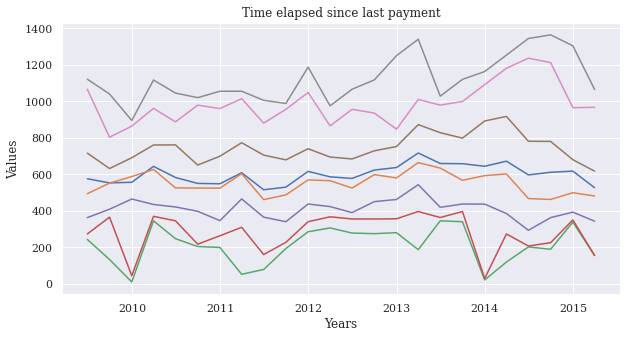

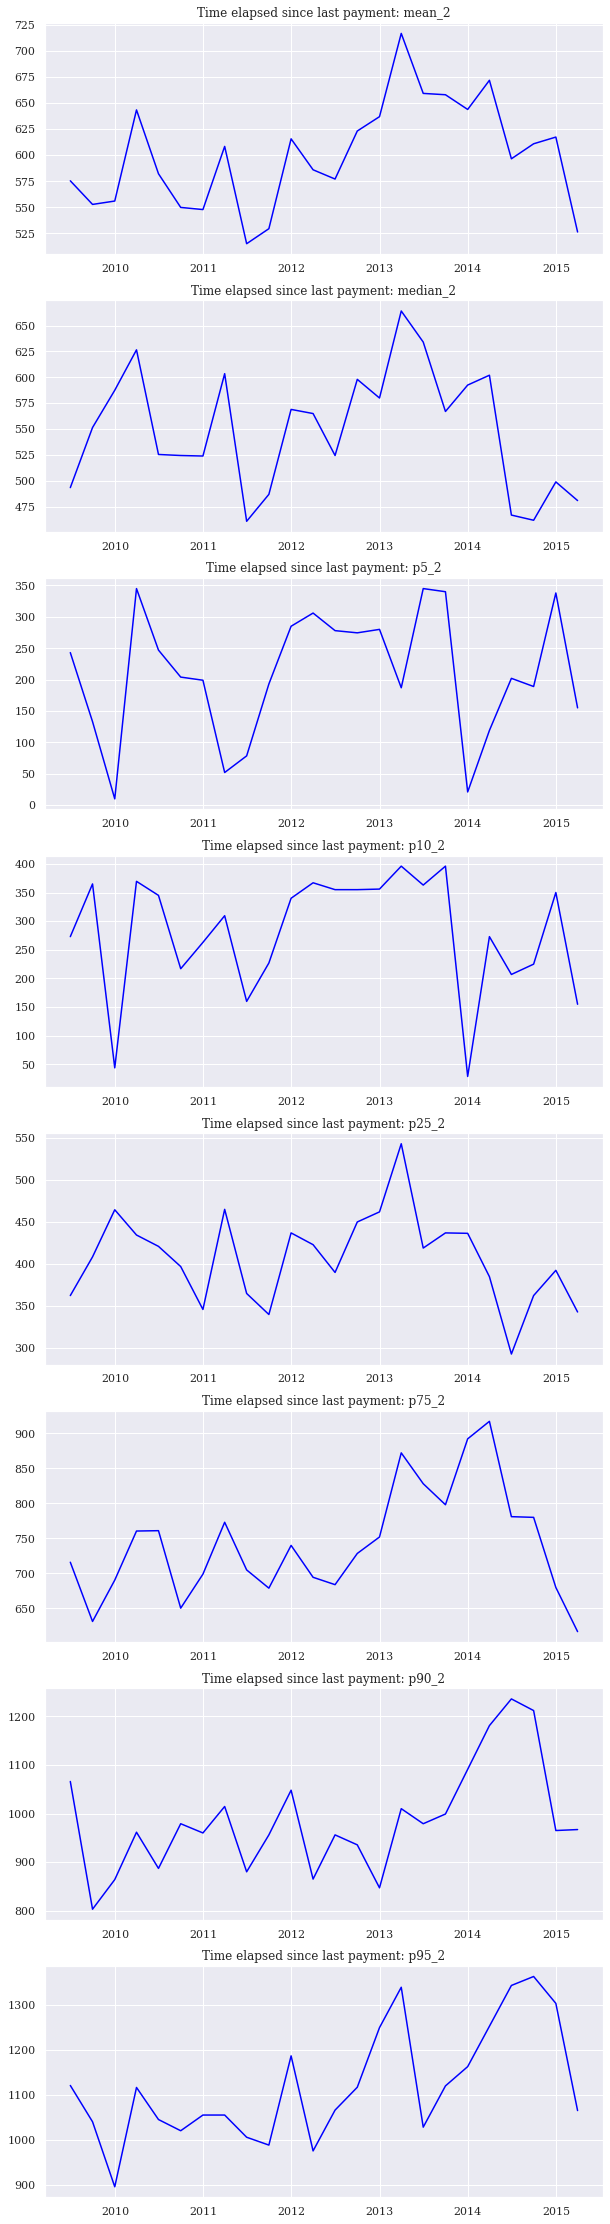

In [ ]:
col = ['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2','p95_2']

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Time elapsed since last payment")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Time elapsed since last payment: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_2,-0.357034
median_2,-0.321691
p5_2,-0.250862
p10_2,-0.317372
p25_2,-0.421446
p75_2,-0.145855
p90_2,0.004065
p95_2,-0.225464


In [ ]:
df[col].describe()

,mean_2,median_2,p5_2,p10_2,p25_2,p75_2,p90_2,p95_2
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,592.698657,541.692308,206.538462,275.269231,397.211538,736.615385,978.826923,1113.807692
std,55.690777,62.763059,97.979174,102.214405,63.059840,78.493224,109.781778,126.907295
min,494.728814,428.000000,10.000000,29.000000,254.000000,617.000000,803.000000,895.000000
25%,550.662879,488.625000,157.250000,215.500000,362.500000,681.000000,894.750000,1031.000000
50%,591.269231,538.500000,200.500000,291.250000,402.750000,722.250000,963.250000,1066.000000
75%,633.471324,591.250000,279.500000,355.750000,436.875000,778.250000,1013.375000,1181.000000
max,716.666667,664.000000,345.000000,396.000000,543.000000,917.000000,1236.000000,1364.000000


Remarks: No stationarity observed. High absolute correlation is not observed in these datas.

### Duration of outstanding payment
mean_3, median_3, p5_3, p10_3, p25_3, p75_3, p90_3, p95_3

In [ ]:
col = ['mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3','p95_3']

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Duration of outstanding payment")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Duration of outstanding payment: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_3,0.251193
median_3,0.108319
p5_3,-0.136611
p10_3,-0.299519
p25_3,0.073593
p75_3,0.250590
p90_3,0.474166
p95_3,0.474166


In [ ]:
df[col].describe()

,mean_3,median_3,p5_3,p10_3,p25_3,p75_3,p90_3,p95_3
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,14.253189,13.230769,3.884615,4.807692,6.307692,22.403846,26.730769,26.730769
std,2.236530,3.782144,1.818283,1.059027,2.634680,3.515734,2.272579,2.272579
min,11.222222,8.000000,0.000000,2.000000,3.000000,16.000000,24.000000,24.000000
25%,12.788799,10.000000,3.000000,5.000000,5.000000,20.000000,25.000000,25.000000
50%,13.728022,12.500000,5.000000,5.000000,5.000000,21.000000,26.000000,26.000000
75%,15.588977,15.750000,5.000000,5.000000,8.250000,25.375000,29.000000,29.000000
max,19.070000,21.000000,6.000000,6.000000,11.000000,30.000000,30.000000,30.000000


Remarks: No stationarity observed. High absolute correlation is not observed in these datas.

### Maximum duration of unpaid invoices
mean_4, median_4, p5_4, p10_4, p25_4, p75_4, p90_4, p95_4

In [ ]:
col = ["mean_4", "median_4", "p5_4", "p10_4", "p25_4", "p75_4", "p90_4", "p95_4"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Maximum duration of unpaid invoices")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Maximum duration of unpaid invoices: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_4,-0.099501
median_4,-0.373032
p5_4,-0.784335
p10_4,-0.736987
p25_4,-0.569781
p75_4,-0.220137
p90_4,0.052470
p95_4,0.159788


In [ ]:
df[col].describe()

,mean_4,median_4,p5_4,p10_4,p25_4,p75_4,p90_4,p95_4
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6.309332,5.692308,0.634615,1.442308,3.173077,7.557692,11.115385,15.365385
std,0.826696,0.722176,1.034966,1.098425,1.333734,0.886870,2.409596,4.353292
min,4.638889,4.000000,-3.000000,-1.000000,1.000000,6.000000,7.000000,11.000000
25%,5.800583,5.125000,0.250000,1.000000,2.000000,7.000000,10.000000,12.000000
50%,6.389266,6.000000,1.000000,1.000000,3.500000,7.000000,11.000000,13.500000
75%,6.607972,6.000000,1.000000,2.000000,4.000000,8.000000,12.000000,16.000000
max,8.081081,7.000000,2.000000,4.000000,6.000000,10.000000,16.000000,27.000000


Remarks: No stationarity observed. High absolute correlation is observed with p5_4, p10_4 and p25_4

### Receivable after distribution of credit balance
mean_5, median_5, p5_5, p10_5, p25_5, p75_5, p90_5, p95_5

In [ ]:
col = ["mean_5", "median_5", "p5_5", "p10_5", "p25_5", "p75_5", "p90_5", "p95_5"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Receivable after distribution of credit balance")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Receivable after distribution of credit balance: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_5,0.765444
median_5,0.868619
p5_5,-0.443694
p10_5,-0.315359
p25_5,0.388881
p75_5,0.554717
p90_5,-0.271406
p95_5,-0.543813


In [ ]:
df[col].describe()

,mean_5,median_5,p5_5,p10_5,p25_5,p75_5,p90_5,p95_5
count,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01,2.600000e+01
mean,762431.554030,669825.326923,66142.269231,127869.596154,299418.711538,1.107552e+06,1.543041e+06,1.808051e+06
std,18139.858899,40986.452684,6737.984135,9841.930713,25683.473489,3.388156e+04,2.679764e+04,2.387877e+04
min,734218.451522,611391.000000,51392.000000,106702.000000,265184.000000,1.059015e+06,1.510580e+06,1.771888e+06
25%,747293.421150,634247.000000,63368.250000,121788.250000,281596.250000,1.079621e+06,1.521551e+06,1.788220e+06
50%,766072.994328,673547.750000,66906.000000,129739.000000,288023.000000,1.107372e+06,1.534704e+06,1.803280e+06
75%,775690.623361,700004.000000,70210.750000,132587.500000,322480.250000,1.137381e+06,1.570948e+06,1.824476e+06
max,789589.747673,740867.000000,76423.000000,149633.000000,347041.000000,1.169078e+06,1.601453e+06,1.867287e+06


Remarks: No stationarity observed. High absolute correlation is observed with mean_5, median_5

### Number of regularized incidents recorded since the date of entry into management
mean_6, median_6, p5_6, p10_6, p25_6, p75_6, p90_6, p95_6

In [ ]:
col = ["mean_6", "median_6", "p5_6", "p10_6", "p25_6", "p75_6", "p90_6", "p95_6"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Number of regularized incidents recorded since the date of entry into management")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Number of regularized incidents recorded since the date of entry into management: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_6,0.571094
median_6,NaN
p5_6,NaN
p10_6,NaN
p25_6,NaN
p75_6,NaN
p90_6,NaN
p95_6,NaN


In [ ]:
df[col].describe()

,mean_6,median_6,p5_6,p10_6,p25_6,p75_6,p90_6,p95_6
count,2.600000e+01,26.0,26.0,26.0,26.0,26.0,26.0,26.0
mean,5.587784e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.771622e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.235422e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.981508e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.746368e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,5.855209e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.419174e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Remarks: Problems with data. We decided to not use these variables.

### Ratio of the rank of the first regularized payment to the expected duration of the contract
mean_7, median_7, p5_7, p10_7, p25_7, p75_7, p90_7, p95_7

In [ ]:
col = ["mean_7", "median_7", "p5_7", "p10_7", "p25_7", "p75_7", "p90_7", "p95_7"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Ratio of the rank of the first regularized payment to the expected duration of the contract")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Ratio of the rank of the first regularized payment to the expected duration of the contract: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_7,-0.367202
median_7,-0.340522
p5_7,-0.398083
p10_7,-0.492664
p25_7,-0.512515
p75_7,0.118883
p90_7,0.249566
p95_7,0.243131


In [ ]:
df[col].describe()

,mean_7,median_7,p5_7,p10_7,p25_7,p75_7,p90_7,p95_7
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.355608,0.361357,0.023489,0.085711,0.240871,0.472207,0.598986,0.673819
std,0.041208,0.029672,0.012786,0.094741,0.096106,0.038894,0.064645,0.097160
min,0.259793,0.298895,0.016667,0.020408,0.027027,0.400000,0.483333,0.500000
25%,0.332397,0.342985,0.016667,0.020833,0.251913,0.455490,0.563542,0.633333
50%,0.364008,0.366837,0.020408,0.027778,0.270833,0.469444,0.586149,0.648649
75%,0.384516,0.380761,0.020833,0.115306,0.290625,0.497396,0.630405,0.684544
max,0.407336,0.412415,0.061225,0.250000,0.333333,0.576389,0.837838,1.000000


Remarks: No stationarity observed. The data is not interesting.

### Percentage contribution
mean_8, median_8, p5_8, p10_8, p25_8, p75_8, p90_8, p95_8

In [ ]:
col = ["mean_8", "median_8", "p5_8", "p10_8", "p25_8", "p75_8", "p90_8", "p95_8"]

fig = plt.figure(figsize = (10,5))
for i in range(8):
  f = sns.lineplot(x=df.index,y=col[i],data=df)
  f.set(xlabel='Years',ylabel='Values')
plt.title("Percentage contribution")

fig = plt.figure(figsize = (10,5*8))
for i in range(8):
  position = 811 + i
  ax = fig.add_subplot(position)
  ax.set_title(f'Percentage contribution: {col[i]}')
  ax.plot(df[col[i]], color='blue')
plt.show()

In [ ]:
correlation.loc[col]

,Correlation with DR
mean_8,-0.815473
median_8,-0.781704
p5_8,-0.629855
p10_8,-0.836450
p25_8,-0.803803
p75_8,0.022499
p90_8,0.788500
p95_8,0.797503


In [ ]:
df[col].describe()

,mean_8,median_8,p5_8,p10_8,p25_8,p75_8,p90_8,p95_8
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.313693,0.259903,-0.030860,0.034965,0.154784,0.469898,0.731580,0.808581
std,0.018865,0.013185,0.084084,0.026789,0.028192,0.013157,0.026792,0.015905
min,0.273811,0.230769,-0.309994,0.000000,0.092772,0.443826,0.709156,0.794521
25%,0.299424,0.250215,0.000000,0.020350,0.140345,0.460607,0.716416,0.798182
50%,0.324189,0.266901,0.000000,0.027517,0.169416,0.472356,0.719626,0.801992
75%,0.327657,0.269974,0.000000,0.056559,0.175579,0.480857,0.727248,0.810388
max,0.329902,0.272352,0.000000,0.086818,0.176624,0.489796,0.801447,0.848101


Remarks: No stationarity observed. The data is interesting. We decide to keep the mean_8, median_8 and p95_8.

### Client type
CD_TY_CLI_RCI_1 and CD_TY_CLI_RCI_2

In [ ]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.set_title('Type of client = Particulier')
ax.plot(df.CD_TY_CLI_RCI_1, color='blue')

ax2.set_title('Type of client = Personne physique')
ax2.plot(df.CD_TY_CLI_RCI_2, color='red')

plt.show()

In [ ]:
correlation.loc[["CD_TY_CLI_RCI_1","CD_TY_CLI_RCI_2"]]

,Correlation with DR
CD_TY_CLI_RCI_1,-0.108402
CD_TY_CLI_RCI_2,0.108402


In [ ]:
df[["CD_TY_CLI_RCI_1","CD_TY_CLI_RCI_2"]].describe()

,CD_TY_CLI_RCI_1,CD_TY_CLI_RCI_2
count,26.000000,26.000000
mean,0.005068,0.994932
std,0.000547,0.000547
min,0.004287,0.994113
25%,0.004533,0.994488
50%,0.005149,0.994851
75%,0.005512,0.995467
max,0.005887,0.995713


Remarks: the majority of client type is "Personne physique". This value doesn't fluctuate a lot and it is always above 99%. Maybe that this variable is not usefull for our model

### Type of housing
CD_MOD_HABI_1 and CD_MOD_HABI_2

In [ ]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.set_title('Type of housing = Tenant and Others')
ax.plot(df.CD_MOD_HABI_1, color='blue')

ax2.set_title('Type of housing = Owner and Missing')
ax2.plot(df.CD_MOD_HABI_2, color='red')

plt.show()

In [ ]:
correlation.loc[["CD_MOD_HABI_1","CD_MOD_HABI_2"]]

,Correlation with DR
CD_MOD_HABI_1,0.663205
CD_MOD_HABI_2,-0.663205


In [ ]:
df[["CD_MOD_HABI_1","CD_MOD_HABI_2"]].describe()

,CD_MOD_HABI_1,CD_MOD_HABI_2
count,26.000000,26.000000
mean,0.217764,0.782236
std,0.026521,0.026521
min,0.185294,0.727543
25%,0.193192,0.760248
50%,0.214917,0.785083
75%,0.239752,0.806808
max,0.272457,0.814706


Remarks: More and more people are becoming owner. The correlation with DR is high, this variable may be use for the model.

### Civil status
CD_ETA_CIV_1 and CD_ETA_CIV_2

In [ ]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.set_title('Civil Status = Singles and Others')
ax.plot(df.CD_ETA_CIV_1, color='blue')

ax2.set_title('Civil Status = Married and Missing')
ax2.plot(df.CD_ETA_CIV_2, color='red')

plt.show()

In [ ]:
correlation.loc[["CD_ETA_CIV_1","CD_ETA_CIV_2"]]

,Correlation with DR
CD_ETA_CIV_1,-0.541476
CD_ETA_CIV_2,0.541476


In [ ]:
df[["CD_ETA_CIV_1","CD_ETA_CIV_2"]].describe()

,CD_ETA_CIV_1,CD_ETA_CIV_2
count,26.000000,26.000000
mean,0.370950,0.629050
std,0.009364,0.009364
min,0.352121,0.610296
25%,0.364778,0.623265
50%,0.372053,0.627947
75%,0.376735,0.635222
max,0.389704,0.647879


Remarks: High correlation with DR. Interesting variable to use.

### Vehicle quality code
CD_QUAL_VEH_1 and CD_QUAL_VEH_2

In [ ]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.set_title('Vehicle quality code = Used vehicles')
ax.plot(df.CD_QUAL_VEH_1, color='blue')

ax2.set_title('Vehicle quality code = New and Missing Vehicle')
ax2.plot(df.CD_QUAL_VEH_2, color='red')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


In [ ]:
correlation.loc[["CD_QUAL_VEH_1","CD_QUAL_VEH_2"]]

,Correlation with DR
CD_QUAL_VEH_1,0.853933
CD_QUAL_VEH_2,-0.853933


In [ ]:
df[["CD_QUAL_VEH_1","CD_QUAL_VEH_2"]].describe()

,CD_QUAL_VEH_1,CD_QUAL_VEH_2
count,26.000000,26.000000
mean,0.331308,0.668692
std,0.025389,0.025389
min,0.303609,0.607871
25%,0.309561,0.654387
50%,0.324743,0.675257
75%,0.345613,0.690439
max,0.392129,0.696391


Remarks: Very high correlation. This variable will be used in our model.

### Profession
CD_PROF_1, CD_PROF_2 and CD_PROF_3

In [ ]:
fig = plt.figure(figsize = (10,15))

ax = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax.set_title('Profession = Workers and Others')
ax.plot(df.CD_PROF_1, color='blue')

ax2.set_title('Profession = Employees, Other Service Personnel')
ax2.plot(df.CD_PROF_2, color='red')


ax3.set_title('Profession = Retirees, Executives, Professions, Engineers, Supervisors, ... and Missing')
ax3.plot(df.CD_PROF_3, color='green')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


In [ ]:
correlation.loc[["CD_PROF_1","CD_PROF_2","CD_PROF_3"]]

,Correlation with DR
CD_PROF_1,-0.528263
CD_PROF_2,0.137722
CD_PROF_3,0.152507


In [ ]:
df[["CD_PROF_1","CD_PROF_2","CD_PROF_3"]].describe()

,CD_PROF_1,CD_PROF_2,CD_PROF_3
count,26.000000,26.000000,26.000000
mean,0.070012,0.342579,0.587409
std,0.003003,0.004990,0.005894
min,0.064568,0.332233,0.574967
25%,0.067053,0.338897,0.584626
50%,0.071018,0.342916,0.586934
75%,0.072646,0.346124,0.591514
max,0.073682,0.352079,0.603199


Remarks: Correlation is not interesting with value CD_PROF_2 and CD_PROF_3. This is not the case with CD_PROF_1.

GLOBAL REMARK CONCERNING THE VARIABLES:
For our first model we will keep these variables:
* CD_MOD_HABI_1
* CD_ETA_CIV_2
* CD_QUAL_VEH_1
* CD_PROF_1

## Conclusion of analysis
After all the process we have these final variables for our model. We will implement a function to immediatly select columns according to the level of collinearity between the features and the correlation with the target

In [ ]:
Xend.head()

,p10_1,p25_1,p5_4,p10_4,median_5,p10_8,p95_8,CD_PROF_1,CD_QUAL_VEH_1,CD_QUAL_VEH_2,PIB,Inflation
TRIMESTRE,,,,,,,,,,,,
2009-06-30,0.992591,0.993691,0.0,0.0,734229.0,0.000000,0.837684,0.066922,0.372296,0.627704,488744.0,1.760576
2009-09-30,0.992587,0.993679,0.0,1.0,718643.0,0.000000,0.833896,0.066023,0.366987,0.633013,489557.0,0.624887
2009-12-31,0.992591,0.993665,1.0,1.0,718194.0,0.000000,0.828571,0.065307,0.352282,0.647718,492638.0,-0.206626
2010-03-31,0.992598,0.993655,1.0,1.0,707963.5,0.009950,0.820184,0.065248,0.346076,0.653924,495051.0,-0.423247
2010-06-30,0.992578,0.993618,-1.0,1.0,702073.0,0.019723,0.811700,0.066271,0.338703,0.661297,498121.0,0.364611


In [ ]:
print("Les variables utilisées sont:")
print("\n".join(list(Xend.columns)))
print("-"*10)
print(f"Cela fait au total {Xend.shape[1]} colonnes utilisées.")

Les variables utilisées sont:
p10_1
p25_1
p5_4
p10_4
median_5
p10_8
p95_8
CD_PROF_1
CD_QUAL_VEH_1
CD_QUAL_VEH_2
PIB
Inflation
----------
Cela fait au total 12 colonnes utilisées.


# Dataset split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xend,1000*Y,test_size=0.20,shuffle=False)

# Normalization
For the normalization we will use the MinMaxScaler form sklearn. We normalize after the train test split

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit(X_test)

array([[9.14103706e-01, 1.00000000e+00, 3.33333333e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.58278915e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.62081103e-01],
       [8.58483458e-01, 8.75251084e-01, 3.33333333e-01, 2.50000000e-01,
        8.73117439e-01, 0.00000000e+00, 9.09603445e-01, 1.59651222e-01,
        9.22710418e-01, 7.72895824e-02, 2.98118881e-02, 3.65763599e-01],
       [9.14103706e-01, 7.25763823e-01, 6.66666667e-01, 2.50000000e-01,
        8.69462219e-01, 0.00000000e+00, 7.82534345e-01, 8.11086566e-02,
        7.08620815e-01, 2.91379185e-01, 1.42789043e-01, 7.55932260e-02],
       [1.00000000e+00, 6.12538323e-01, 6.66666667e-01, 2.50000000e-01,
        7.86177730e-01, 1.14605946e-01, 5.82387659e-01, 7.45735895e-02,
        6.18270741e-01, 3.81729259e-01, 2.31271314e-01, 0.00000000e+00],
       [7.32173437e-01, 2.21376467e-01, 0.00000000e+00, 2.50000000e-01,
        7.38224328e-01, 2.27176887e-01, 3.79914994e-01, 1.86

# Basic model


In [ ]:
# Simple model without any gridsearch 

models = ["lin","rid","las","ela","sgd","xgb","svr","knn"]
metrics = ["rmse","mse","mae","r2"]
parameters = {"p_lin":{"fit_intercept":False},"p_xgb":{"booster":"gblinear"}}

tl.summary_ml(X_train,y_train,X_test,y_test,models,parameters=parameters,metrics = metrics)

[15:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,rmse,mse,mae,r2
Index,,,,
LinearRegression,0.708312,0.501706,0.597225,-13.584476
Ridge,0.342520,0.117320,0.286681,-2.410473
Lasso,0.190916,0.036449,0.161053,-0.059557
ElasticNet,0.190916,0.036449,0.161053,-0.059557
SGDRegressor,0.190916,0.036449,0.161053,-0.059557
XGBRegressor,0.164948,0.027208,0.156534,0.209074
LinearSVR,0.462157,0.213589,0.343829,-5.208984
KNeighborsRegressor,0.462383,0.213798,0.343969,-5.215056


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()
xgb = xgb.fit(X_train,y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_xgb = xgb.predict(X_test)

[16:04:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cat = CatBoostRegressor()
cat = cat.fit(X_train,y_train)
y_pred_train_cat = cat.predict(X_train)
y_pred_cat = cat.predict(X_test)

Learning rate set to 0.021889
0:	learn: 0.3112176	total: 231us	remaining: 231ms
1:	learn: 0.3081835	total: 1.77ms	remaining: 883ms
2:	learn: 0.3045307	total: 2.39ms	remaining: 794ms
3:	learn: 0.3019271	total: 3.14ms	remaining: 781ms
4:	learn: 0.2988392	total: 3.8ms	remaining: 757ms
5:	learn: 0.2965660	total: 4.49ms	remaining: 744ms
6:	learn: 0.2941440	total: 5.2ms	remaining: 737ms
7:	learn: 0.2914091	total: 5.87ms	remaining: 728ms
8:	learn: 0.2884145	total: 6.56ms	remaining: 722ms
9:	learn: 0.2857483	total: 7.15ms	remaining: 708ms
10:	learn: 0.2829319	total: 7.84ms	remaining: 705ms
11:	learn: 0.2795202	total: 8.43ms	remaining: 694ms
12:	learn: 0.2769885	total: 9.11ms	remaining: 692ms
13:	learn: 0.2742467	total: 9.76ms	remaining: 687ms
14:	learn: 0.2714807	total: 10.3ms	remaining: 678ms
15:	learn: 0.2691900	total: 11ms	remaining: 677ms
16:	learn: 0.2661990	total: 11.7ms	remaining: 676ms
17:	learn: 0.2633376	total: 12.3ms	remaining: 669ms
18:	learn: 0.2609369	total: 12.9ms	remaining: 667

In [ ]:
params = {"booster":["gblinear"],"lambda":np.linspace(0,3,50),"alpha":[0,1]}

In [ ]:
tl.params_grid(X_train,y_train,X_test,y_test,'xgb',parameters=params,metric="r2")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[16:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:45] WARNING: /workspace/src/objective/reg

({'alpha': 0, 'booster': 'gblinear', 'lambda': 0.0}, 0.2090736655657084)

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense,InputLayer

In [ ]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],),name='Input_Layer'))
model.add(Dropout(0.5,name='DRPT1-0.6'))     
model.add(Dense(200, activation='tanh',name='D4'))          
model.add(Dense(50, activation='tanh',name='D5'))             
model.add(Dense(1,activation='linear',name='Output_Layer'))
mse = tf.keras.losses.MeanSquaredError()
model.compile(optimizer= 'adam', loss=mse)
model.fit(X_train,y_train,
                                batch_size=2,
                                epochs=100,
                                validation_data=(X_test, y_test),
                                verbose=1)
y_pred_test = model.predict(X_test)

Epoch 1/100
10/10 [==============================] - 1s 17ms/step - loss: 2.2388 - val_loss: 0.0671
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8404 - val_loss: 0.0431
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2736 - val_loss: 0.2154
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2755 - val_loss: 0.2818
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3501 - val_loss: 0.0396
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1826 - val_loss: 0.0687
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3297 - val_loss: 0.0622
Epoch 8/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2994 - val_loss: 0.0656
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.1432 - val_loss: 0.0819
Epoch 10/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2440 - val_loss: 0.0785
Epoch

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


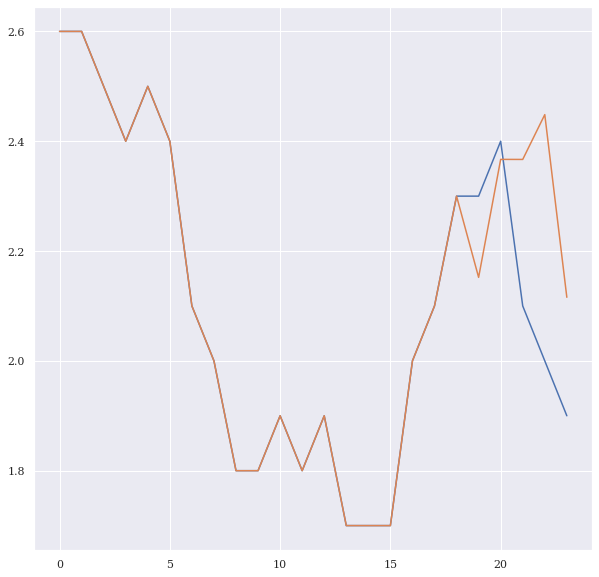

In [ ]:
fig = plt.figure(figsize = (10,10))
#plt.plot(list(y_pred_train_xgb) + list(y_pred_xgb))
#plt.plot(list(y_pred_train_cat) + list(y_pred_cat))
plt.plot(list(y_train) + list(y_test))
plt.plot(list(y_train) + list(y_pred_test))